In [1]:
# !pip install finance-datareader
# pip install Prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# FinanaceDataReader를 통해주가 데이터를 가져옴
import FinanceDataReader as fdr

# 이더리움 코인
# 2020-01-01 부터의 자료를 가져옴
eth = fdr.DataReader('ETH/KRW', '2020-01-01')
eth

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-01,150700,148900,153200,148600,4920.0,0.0101
2020-01-02,146800,150600,150700,146700,8490.0,-0.0259
2020-01-03,154800,146800,155600,145000,13080.0,0.0545
2020-01-04,154600,154700,156300,152600,10440.0,-0.0013
2020-01-05,155700,154500,158700,154000,14250.0,0.0071
...,...,...,...,...,...,...
2021-12-09,5111000,5453000,5493000,5095000,6870.0,-0.0627
2021-12-10,4942000,5110000,5240000,4932000,8970.0,-0.0331
2021-12-11,5079000,4942000,5091000,4890000,4990.0,0.0277


In [3]:
# 페이스북 prophet import
from fbprophet import Prophet

In [4]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [5]:

# fbprophet 라이브러리를 사용하기 위해선 column 명을 y와 ds로 바꿔야함
eth['y'] = eth['Close']
eth['ds'] = eth.index

eth

,Close,Open,High,Low,Volume,Change,y,ds
Date,,,,,,,,
2020-01-01,150700,148900,153200,148600,4920.0,0.0101,150700,2020-01-01
2020-01-02,146800,150600,150700,146700,8490.0,-0.0259,146800,2020-01-02
2020-01-03,154800,146800,155600,145000,13080.0,0.0545,154800,2020-01-03
2020-01-04,154600,154700,156300,152600,10440.0,-0.0013,154600,2020-01-04
2020-01-05,155700,154500,158700,154000,14250.0,0.0071,155700,2020-01-05
...,...,...,...,...,...,...,...,...
2021-12-09,5111000,5453000,5493000,5095000,6870.0,-0.0627,5111000,2021-12-09
2021-12-10,4942000,5110000,5240000,4932000,8970.0,-0.0331,4942000,2021-12-10
2021-12-11,5079000,4942000,5091000,4890000,4990.0,0.0277,5079000,2021-12-11


In [6]:
# prophet 객체 선언 및 학습
# changepoint_prior_scale이 클수록 모델은 과적합에 가까워짐
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True, daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(eth)

In [7]:

# periods : 예측하고 싶은 기간
future = prophet.make_future_dataframe(periods=10)
future.tail(5)

,ds
718,2021-12-19
719,2021-12-20
720,2021-12-21
721,2021-12-22
722,2021-12-23


In [8]:
# ds: Date, yhat : 예측값, yhat_lower & yhat_upper : uncertainty intervals
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
713,2021-12-14,4.877631e+06,4.697960e+06,5.057783e+06
714,2021-12-15,4.844949e+06,4.675087e+06,5.016485e+06
715,2021-12-16,4.767822e+06,4.577362e+06,4.942434e+06
716,2021-12-17,4.634836e+06,4.465555e+06,4.819963e+06
717,2021-12-18,4.592182e+06,4.404611e+06,4.765951e+06
718,2021-12-19,4.569073e+06,4.385712e+06,4.757303e+06
719,2021-12-20,4.574977e+06,4.386067e+06,4.754334e+06
720,2021-12-21,4.581264e+06,4.399753e+06,4.765670e+06
721,2021-12-22,4.657962e+06,4.486261e+06,4.848207e+06
722,2021-12-23,4.713161e+06,4.521429e+06,4.903316e+06


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


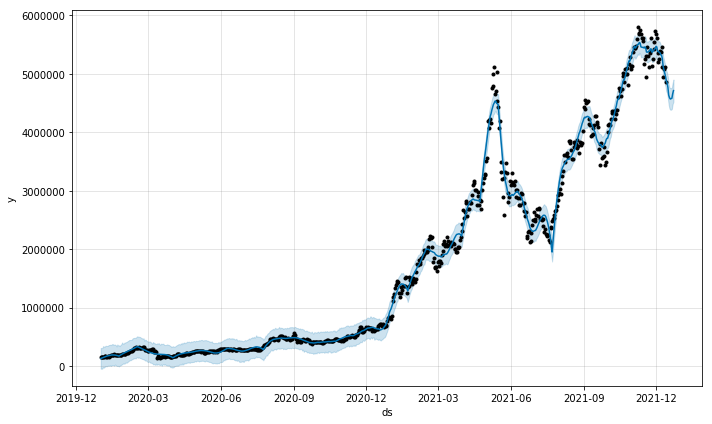

In [9]:
# 시각화
fig1 = prophet.plot(forecast)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be remov

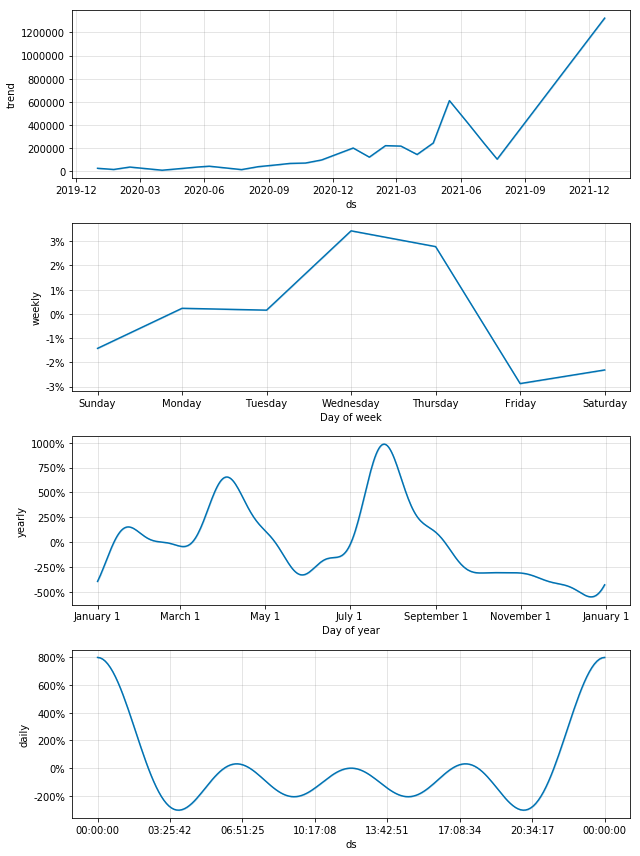

In [10]:
# 트렌드 정보 시각화
fig2 = prophet.plot_components(forecast)